# **Вводная часть**

## Что такое "метапрограммирование"?

***Метапрограммирование*** — сложная, но одна из самых интересных тем в языке программирования Python. Метапрограммирование делает данный язык невероятно мощным.

\\

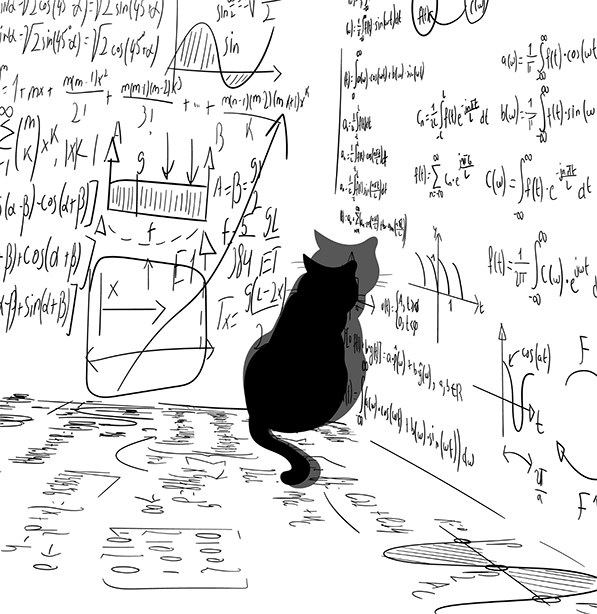

Что же такое ***метапрограммирование***?

Это процесс создания программ, которые работают с данными (область определения), представляющими собой другую программу (чаще всего, саму себя).

Рядом с термином "метапрограммирование" часто употребляют понятие "интроспекция", т.е. программа может "заглянуть" в саму себя и "понять", что же с ней происходит (смотрим на картинку выше).

Python же обладает мощнейшими средствами для метапрограммирования, с которыми мы и будем разбираться дальше.


## Почему следует изучить эту тему?

Ответ на вопрос о том, стоит ли использовать метапрограммирование, на самом деле, не так однозначен (о "плюсах" и "минусах" можно узнать [здесь](https://colab.research.google.com/drive/14Md6pEOVc2uTKExi5eyKhPmj6TX9xn04#scrollTo=Bkqt7k3a7kQC)). В этом же разделе рассмотрим, зачем вообще может понадобиться метапрограммирование.

Вполне возможно, что вы уже используете метапрошграммирование в свое й практике. Например, мы часто используем [*декораторы*](https://colab.research.google.com/drive/14Md6pEOVc2uTKExi5eyKhPmj6TX9xn04#scrollTo=dhmcvahf6hlv) для улучшения кода Python и добавления дополнительных функций к существующим функциям или классам. Эти декораторы являются частью метапрограммирования в Python.

Также метапрограммирование можно использовать для кодогенерации. Это когда у нас есть программа на одном языке прораммирования, которая в ходе работы генерирует программу на другом языке (или на том же) и которая затем будет выполнена в необходимый момент.

Надо понимать, что метапрограммирование — это продвинутая техника, без которой долгое время можно ощущать себя вполне кофмортно в профессиональном плане. Однако в какой-то момент вы столкнетесь с тем, что другие эту технику применяют, многие библиотеки используют метапрограммирование. Конечно, если к моменту столкновения с этой темой, у вас не будет даже базового понимания принципов и инструментов метапрограммирования, будет сложно работать над проектом. 

## Модель данных в Python

Прежде чем начать, стоит вспомнить некоторые важные сведения о модели данных в Python. 

Первое, что следует помнить, — **в Python нет приватности**. Принцип кажется вполне простым и понятным, поэтому здесь не будем подробно останавливаться.

Идем дальше. И вспоминаем, что в Python всё является *объектом*.

Функция, константа, переменная, буквально все является объектом. Для уточнения, даже *класс является объектом*. В результате мы можем рассматривать класс как любой другой объект и передавать класс в качестве параметра, сохранять его и изменять.

Класс — это объект, который можно использовать для создания экземпляров новых объектов. Можно представить, что класс — это корзина, в которую складывают объекты. Он определяет протоколы и правила для объектов, которые он создает. Метакласс же выше класса. Он объединяет набор классов. У нас может быть метаинформация о классах внутри метакласса.

В качестве примера рассмотрим код ниже:

In [ ]:
def get_information():
    class Info:
        pass
    return Info

print(get_information())

<class '__main__.get_information.<locals>.Info'>


Этот метод возвращает класс FinTechExplained:

`<class '__main__.get_information.<locals>.Info'>`

Соответственно, второе ключевое замечание, которое следует помнить, заключается в том, что **в Python все является объектом**, включая класс, а каждый класс, в свою очередь, создается метаклассом.

\\


Также следует вспомнить, что такое type().
Конструктор класса типа вызывается для получения типа объекта.

В качестве примера выполним следующее:

In [ ]:
def get_information():
    class Info:
        pass
    return Info

print(type(get_information))
print(type(get_information()))

<class 'function'>
<class 'type'>


На выходе получаем следующее:

`<class 'function'>`

`<class 'type'>`

Мы видим, что метод возвращает класс. Это означает, что каждый класс по существу является типом типа.

Соответственно, третий ключевой момент, который следует запомнить - **каждый класс является экземпляром типа**.

\\
Теперь конструктор типа можно использовать для создания классов, которые затем могут порождать экземпляры класса.

Рассмотрим следующий пример:

In [ ]:
class Info:
    def __init__(self, title):
        self.title = title

    def get_title(self):
        return f'Title : {self.title}'

book = Info('Metaprogramming')
print(book.get_title())

Title : Metaprogramming


В классе есть конструктор, принимающий некий заголовок (*title*), и метод, возвращающий этот заголовок (*get_title()*).

Также мы можем создать класс, не объявляя его. Вы, наверное, спросите, как же так? Ответ прост: используем конструктор типа. Конструктор вызывается как `type(cls, what, bases=None, dict=None)` и принимает следующие параметры:


1.   Имя класса
2.   Кортеж базовых классов
3.   Словарь ключей (атрибутов класса) и их значений


 Создадим знакомый нам класс Info, но уже используя конструктор типа. 

In [ ]:
def Info_init__(self, title):
    self.title = title

book = type("Info",
              (),
              {"__init__": Info_init__,
               "get_title": lambda self: f'Title : {self.title}'})

book = Info('Metaprogramming')
print(book.get_title())

Title : Metaprogramming


Как видите, такой способ создания класса эквивалентен привычному нам объявлению класса. 

Обратите внимание, что параметр dict — это как раз то место, куда мы передаем словарь с ключами, где ключи — это имена методов, а значения — реализация методов.

И вот все эти факты, которые мы вспомнили, складываются в один большой вывод о том, какой мощный инструмент у нас в руках: прямо в run time мы можем взять какой-либо класс, взять функцию, проникнуть в ее "внутренний мир", достать необходимые служебные атрибуты (можно даже их изменить) и добиться всем этим нужного результата.

\\

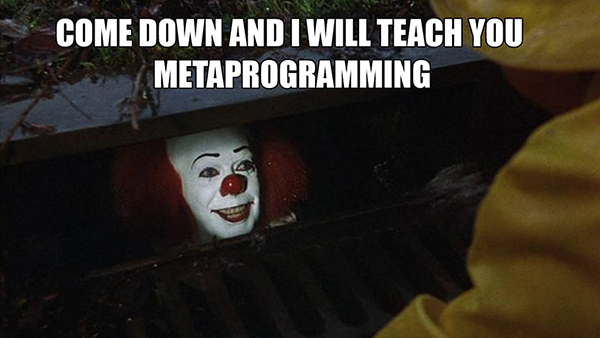

\\

Итак, подведем небольшой промежуточный итог :
- познакомились с понятием "метапрограммирование"
- примерно представляем, для чего оно может понадобиться
- вспомнили, как работает модель данных в Python, и даже протестировали небольшие фрагменты кода, которые наглядно показали нам работу этой модели

Все это очень интересно, но пока не очень понятно, что же за волшебное метапрограммирование такое. Так вот теперь с этим небольшим багажом вводных знаний переходим к практике - к конкретным способам применения метапрограммирования.

# **Метапрограммирование на практике**

## Замыкания, декораторы

**Замыкания** — важный инструмент в функциональном программировании, и с их помощью можно реализовать некоторые важные концепции, такие как каррирование, например (преобразование функции от многих аргументов в набор функций, каждая из которых является функцией от одного аргумента).

**Замыкание** — это комбинация функции и множества ссылок на переменные в *области видимости функции*. Последнее иногда называют с*сылочной средой*. Замыкание позволяет выполнять функцию за пределами области видимости. В Python ссылочная среда хранится в виде набора ячеек. Доступ к ним можно получить с помощью атрибутов `func_closure` или `__closure__`. В Python 3 используется только `__closure__`.

Важно понимать, что речь идёт просто о ссылках, а не о глубоких копиях объектов. Неважно, являются ли объекты неизменяемыми, но для изменяемых объектов (например, списков) это важно. Для иллюстрации обратимся к примеру ниже. Обратите внимание, у функций также есть __globals__, где хранится глобальное ссылочное окружение, для которого была определена функция.

In [ ]:
def print_s(s):
    def func():
        print(s)
    return func

hello = print_s("Hello")
world = print_s("World!")
hello() # возвращаем функцию распечатки -> 'Hello'
world() # возвращаем функцию распечатки -> 'World!'
print(hello is world) # печатаем результат сравнения строк -> 'False'

world.__closure__ # ссылочная среда -> (<cell at 0x7f6899824710: str object at 0x7f689dac90b0>,)


Hello
World!
False


(<cell at 0x7f68998099d0: str object at 0x7f6899848930>,)

In [ ]:
def print_s(s):
    def func():
        print(s)
    return func

hello = print_s("Hello")
world = print_s("World!")

print([str(c.cell_contents) for c in hello.__closure__]) # содержимое ячейки -> ['Hello']
print([str(c.cell_contents) for c in world.__closure__]) # содержимое ячейки -> ['World!']

['Hello']
['World!']


Теперь рассмотрим применение замыканий как раз на примере каррирования. Как уже упомяналось выше каррирование - это преобразование функции от многих аргументов в набор функций, каждая из которых является функцией от одного аргумента. Так, например, если у нас есть функция `f(x, y, z)`. Карри преобразует его в `g(x)(y)(z) = ((g(x))(y))(z)`. Пример, как мы можем реализовать это на Python:

In [ ]:
def curry(f):
    argc = f.__code__.co_argcount
    f_args = []
    f_kwargs = {}
    def g(*args, **kwargs):
        nonlocal f_args, f_kwargs
        f_args += args
        f_kwargs.update(kwargs)
        if len(f_args)+len(f_kwargs) == argc:
            return f(*f_args, **f_kwargs)
        else:
            return g          
    return g

func = lambda x,y,z: x**2 + 2*y + z

cfunc = curry(func)
print(cfunc(1)(2))

cfunc(3)

<function curry.<locals>.g at 0x7f68997c3d40>


8

Мы снова используем замыкание. Но это замыкание `g` является рекурсивной функцией. На рисунке ниже показано, как работает эта функция. 

Во-первых, внешняя функция `curry` получает `f` в качестве аргумента. `f` — функция, которая будет подвергаться каррированию. Мы получаем количество аргументов, которые `f` принимает (арность `f`), используя атрибут `co_argcount`, и сохраняем его в `argc`. В этом примере `args` = 3. У нас есть две нелокальные переменные `f_args` и `f_kwargs`, которые используются для хранения аргументов, принимаемых `g`. `curry` возвращает замыкание `g` и присваивает его `cfunc`. Итак, когда мы вызываем `cfunc(1)(2)`, мы вызываем `g(1)(2)`. Сначала будет производиться работа с `g(1)`.

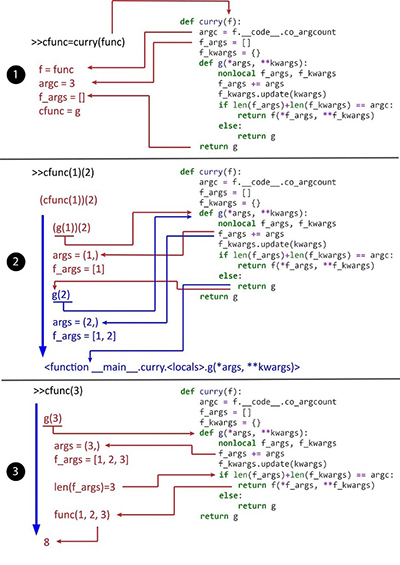

`g` добавляет свой аргумент в список `f_args и`, поскольку `g` не захватил все аргументы функции `func`, рекурсивно возвращает себя. Таким образом, результатом `g(1)` является `g`, а `g(1)(2)` превращается в `g(2)`. Теперь переход к `g(2)`. Снова `g` добавляет свой аргумент в список `f_args`, и `f_args` = [1,2]. `g` снова возвращает себя, но в данный момент у `g` уже нет рабочих аргументов. В результате окончательный вывод `cfunc(1)(2)` — это `g`, который отображается как `<function __main__.curry.<locals>.g(*args, **kwargs)> ` в Python. Затем мы запускаем `cfunc(3)`. На этот раз вычисляется `g(3)` и к `f_args` добавляется 3, и оно будет равно [1,2,3]. Теперь `len(f_args)` равно `argc`, и все исходные аргументы функции `func` были захвачены, поэтому, наконец, функция `func(1,2,3)` будет вычислена и возвращена функцией `g`.

**Декораторы** также являются мощным инструментом в Python, они, в свою очередь, реализованы с использованием замыканий и позволяют программистам изменять поведение функции, не изменяя ее саму.

В Python декораторы применяются к функции или классу с помощью символа **`@`**. В качестве первого примера давайте используем простой декоратор, который регистрирует вызовы функций.

In [ ]:
import time

def logged(time_format):
    def decorator(func):
        def decorated_func(*args, **kwargs):
            print("- Running '{}' on {} ".format(
                func.__name__,
                time.strftime(time_format)))
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            print("- Finished '{}', execution time = {:0.3f}s ".format(
                func.__name__,
                end_time - start_time
            ))
            return result
        decorated_func.__name__ = func.__name__
        return decorated_func
    return decorator

@logged("%b %d %Y - %H:%M:%S")
def add1(x, y):
    time.sleep(1)
    return x + y


@logged("%b %d %Y - %H:%M:%S")
def add2(x, y):
    time.sleep(2)
    return x + y


print(add1(1, 2))
print(add2(1, 2))

- Running 'add1' on May 19 2022 - 20:00:37 
- Finished 'add1', execution time = 1.001s 
3
- Running 'add2' on May 19 2022 - 20:00:38 
- Finished 'add2', execution time = 2.002s 
3


Здесь функции `add1` и `add2` оформлены с помощью `logged`, а также дан пример вывода. Заметьте, что формат времени хранится в замыкании возвращаемых функций с декоратором. Поэтому понимание замыканий необходимо для понимания декораторов Python.

Также обратите внимание, как имя возвращаемой функции заменяется именем оригинальной функции в случае, если оно используется позже. Python не делает этого по умолчанию.

Декораторы — полезный инструмент для метапрограммирования в Python. Так как метапрограммирование есть создание функций, основной целью которых является манипулирование кодом. Примеры этого раздела показали, как можно изменить поведение функций, обернув их разными декораторами.

## Метаклассы

Понятие **"метакласс"** уже не раз использовалось в прошлом материале. Пришло время детальнее рассмотреть это понятие.

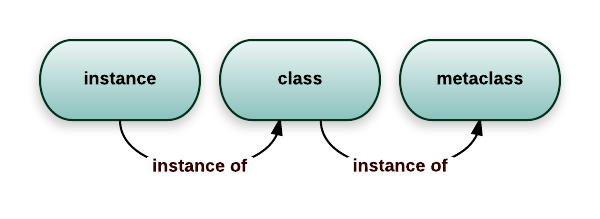

Если классы — это объекты, которые создают объекты, то как называются объекты, которые создают классы? Здесь есть чёткий ответ: такие объекты называются метаклассами. Самым простым метаклассом можно считать type, о котором мы уже говорили ранее. 

**Важно!** Когда type получает на вход один параметр, он возвращает тип объекта, переданного в качестве параметра. В данном случае он не работает как метакласс. Когда type получает на вход три параметра, он работает как метакласс и создаёт класс на основе переданных параметров. В качестве параметров, как уже было упомянуто, должны передаваться имя класса, кортеж родителей (классы, от которых происходит наследование), словарь атрибутов. Последние два параметра могут быть пустыми.

Также можно создавать свои метаклассы: это может быть любой вызываемый (callable) объект, который способен принять три параметра и вернуть объект класса. Такие метаклассы можно применять к классу. Метакласс можно указать при объявлении класса. Давайте рассмотрим этот приём на примере, который заодно продемонстрирует возможности метаклассов:

In [ ]:
def new_metaclass(name, parents, attributes):
     return 'Hello world!'

class Hello(metaclass=new_metaclass):
     pass

print(Hello)
print(type(Hello))

Hello world!
<class 'str'>


Как мы видим, `Hello` оказывается переменной, которая указывает на строку *'Hello world!'*.

Теперь рассмотрим более сложный и практичный пример. С помощью метакласса можно, например, логировать каждый метод в классе. Давайте рассмотрим такой пример:

In [ ]:
import time
from functools import wraps

def logged(time_format, name_prefix=""):
    def decorator(func):
        if hasattr(func, '_logged_decorator') and func._logged_decorator:
            return func

        @wraps(func)
        def decorated_func(*args, **kwargs):
            start_time = time.time()
            print("- Running '{}' on {} ".format(
                name_prefix + func.__name__,
                time.strftime(time_format)
            ))
            result = func(*args, **kwargs)
            end_time = time.time()
            print("- Finished '{}', execution time = {:0.3f}s ".format(
                name_prefix + func.__name__,
                end_time - start_time
            ))
            return result
        decorated_func._logged_decorator = True
        return decorated_func
    return decorator

def log_everything_metaclass(class_name, parents, attributes):
    print('Creating class', class_name)
    myattributes = {}
    for name, attr in attributes.items():
        myattributes[name] = attr
        if hasattr(attr, '__call__'):
            myattributes[name] = logged(
                "%b %d %Y - %H:%M:%S", class_name + "."
            )(attr)
    return type(class_name, parents, myattributes)


class C(metaclass=log_everything_metaclass):

    def __init__(self, x):
        self.x = x

    def print_x(self):
        print(self.x)

print('Starting object creation')
c = C('Test')
c.print_x()

Creating class C
Starting object creation
- Running 'C.__init__' on May 12 2022 - 23:18:45 
- Finished 'C.__init__', execution time = 0.000s 
- Running 'C.print_x' on May 12 2022 - 23:18:45 
Test
- Finished 'C.print_x', execution time = 0.002s 


Как мы можем видеть, у декораторов и метаклассов есть много общего. Фактически, метаклассы умеют всё, что можно сделать с помощью декоратора класса. Синтаксис декораторов более простой, поэтому, по возможности, следует использовать именно их. Метаклассы умеют больше, так как они запускаются перед созданием класса, а не после, как декораторы. Чтобы убедиться в этом, давайте создадим декоратор и метакласс и посмотрим на порядок исполнения.

In [ ]:
def new_metaclass(class_name, parents, attributes):
    print('Do something in metaclass.')
    return type(class_name, parents, attributes)


def new_class_decorator(class_):
    print('Do something in decorator.')
    return class_


@new_class_decorator
class ExampleObject(metaclass=new_metaclass):
    def __init__(self):
        print('Start. Object was created.')

example = ExampleObject()

Do something in metaclass.
Do something in decorator.
Start. Object is creating...


## Дескрипторы

Очень часто на технических собеседованиях разработчиков спрашивают, что такое "дескриптор". Сложность и коварность вопроса в том, что на практике в своих проектах почти никто не использует дескрипторы явно. Вы можете проработать все жизнь программистом Python и ни разу не задействовать их ни в одном своем проекте. Но при этом вы будете почти постоянно использовать их через подключаемые сторонние библиотеки. Дескрипторы традиционно используются, только если вы создаете ORM или новый фреймворк. Поэтому знать о них нужно, но не столько для их использования, а больше для понимания того, как работает "волшебство" Python.

Давайте для небольшого понимания, о чем пойдет речь, рассмотрим небольшой фрагмент, который был частично взят из учебника по популярной ORM библиотеки SQLAlchemy.


In [ ]:
from sqlalchemy import Column, Integer, String


class Base:
  pass


class User(Base):
    id = Column(Integer, primary_key=True)
    name = Column(String)

Подобный код можно встреть, наверное, в любой ORM в Python. А вы когда-нибудь задумывались, почему атрибуты id и name не передаются через метод `__init__` и потом не привязываются к экземпляру класса, как это обычно делается в классе?

Как минимум для объяснения этого нам и надо разобраться с дескрипторами.



---



**Дескриптор** - это атрибут объекта со “связанным поведением”, то есть такой атрибут, при доступе к которому его поведение переопределяется методом протокола дескриптора. Эти методы  `__get__`, `__set__` и `__delete__`. Если хотя бы один из этих методов определен в объекте, то можно сказать, что этот метод - дескриптор.

Поясним это не самое простое определение на примере. Допустим, что у нас есть атрибут `a` объекта `obj`. С этим объектом мы хотим сделать следующее:

1. получить значение атрибута -> `some_variable = obj.a`
2. изменить его значение -> `obj.a = 'new value'`
3. удалить атрибут -> `del obj.a`

Python позволяет перехватить выше упомянутые попытки доступа к атрибуту и переопределить связанное с этим доступом поведение. Это реализуется через механизм протокола дескрипторов.

Теперь давайте рассмотрим пример:

In [ ]:
class Order:
    def __init__(self, name, price, quantity):
        self.name = name
        self.price = price
        self.quantity = quantity
    def total(self):
        return self.price * self.quantity
apple_order = Order('apple', 1, 10)
print(apple_order.total())

apple_order.quantity = -10
print(apple_order.total())

10
-10


Что нам не нравится в этой программе? Наши данные никак не проверяются. То есть цена (price) и количество (quantity) может принимать любое значение.

Давайте теперь посмотрим вариант решения этой проблемы:

In [ ]:
class Order:
    def __init__(self, name, price, quantity):
        self._name = name
        self.price = price
        self._quantity = quantity # переименовали атрибут в _quantity, чтобы избежать дальнейшее получение ошибки RecursionError в quantity()
    @property
    def quantity(self):
        return self._quantity
    @quantity.setter
    def quantity(self, value):
        if value < 0:
            raise ValueError('Недопустимое отрицательное значение!')
        self._quantity = value
    def total(self):
            return self.price * self.quantity

apple_order.quantity = -10

Мы преобразовали "quantity" из простого атрибута в неотрицательное свойство (property).

Что еще плохо в этом коде? Мы забыли об атрибуте "price", который также не может быть отрицательным. Конечно, можно начать делать то же самое, что было сделано с "quantity", но что если у нас будет двадцать таких атрибутов... Помните принцип DRY: когда вы обнаруживаете, что делаете одно и то же дважды, - это хороший признак для удаления повторно используемого кода.


`
`

Чем же нам могут помочь *дескрипторы*?

Для этого нам надо создать класс NonNegative и реализовать протокол дескрипторов:

In [ ]:
class NonNegative:
    def __init__(self, name):
        self.name = name
    def __get__(self, instance, owner):
        return instance.__dict__[self.name]
    def __set__(self, instance, value):
        if value < 0:
            raise ValueError('Недопустимое отрицательное значение!')
        instance.__dict__[self.name] = value

Теперь немного переопределим наш класс:

In [ ]:
class NonNegative:
    def __init__(self, name):
        self.name = name  
        # атрибут `name` необходим при создание объекта `NonNegative` в классе Order, 
        # в данный момент еще не происходит изменения значения "price". 
        # Таким образом, мы явно передаем имя атрибута "price", что бы использовать его, как ключ при доступе к экземпляру __dict__
    def __get__(self, instance, owner):
        return instance.__dict__[self.name]  
        # вместо использования встроенный функций getattr и setattr, 
        # мы напрямую обращаемся к объекту __dict__ , что бы избежать ошибки  RecursionError, 
        # так как обращение через встроенные функции будут также перехватываться протоколом дескрипторов
    def __set__(self, instance, value):
        if value < 0:
           raise ValueError('Недопустимое отрицательное значение!')
        instance.__dict__[self.name] = value
        # вместо использования встроенный функций getattr и setattr, 
        # мы напрямую обращаемся к объекту __dict__ , что бы избежать ошибки  RecursionError, 
        # так как обращение через встроенные функции будут также перехватываться протоколом дескрипторов


class Order:
    price = NonNegative('price')
    quantity = NonNegative('quantity')
    def __init__(self, name, price, quantity):
        self._name = name
        self.price = price
        self.quantity = quantity
    def total(self):
        return self.price * self.quantity


apple_order = Order('apple', 1, 10)
apple_order.total()
apple_order.price = -10
apple_order.quantity = -10

Но как известно, предела совершенству нет, поэтому используем возможности Python 3.6 и сделаем наш код еще более функциональным.

У нас все еще есть избыточность кода в строках

`price = NonNegative('price')`

`quantity = NonNegative('quantity')`

Как же нам сделать более чистое API по типу

`price = NonNegative()`, `quantity = NonNegative()` ?


Давайте используем новый протокол дескрипторов появившийся в Python 3.6:

`object.__set_name__(self, owner, name)`

*   вызывается во время создания класса 
*   в этом случае дескриптор назначается на имя атрибута

С этим протоколом, мы можем удалить `__init__` и привязать имя атрибута к дескриптору.

Теперь окончательный код выглядит так:

In [ ]:
class NonNegative:
    def __get__(self, instance, owner):
        return instance.__dict__[self.name]
    def __set__(self, instance, value):
        if value < 0:
           raise ValueError('Недопустимое отрицательное значение!')
        instance.__dict__[self.name] = value
    def __set_name__(self, owner, name):
        self.name = name


class Order:
    price = NonNegative()
    quantity = NonNegative()
    def __init__(self, name, price, quantity):
        self._name = name
        self.price = price
        self.quantity = quantity
    def total(self):
        return self.price * self.quantity


apple_order = Order('apple', 1, 10)
apple_order.total()
apple_order.price = -10
apple_order.quantity = -10

Дескрипторы, безусловно, являются хорошим инструментом для привязки поведения к атрибутам. Хотя метаклассы потенциально могут делать то же самое, дескриптор может решить проблему более изящно.

## Интроспекция и рефлексия

**Интроспекция** — это способность программы исследовать тип или свойства объекта во время работы программы. Во время работы программы вам может понадобиться узнать, каков тип объекта, является ли он экземпляром класса. Некоторые языки даже позволяют узнать иерархию наследования объекта. Возможность интроспекции есть не только в Python, но и в таких языках, как Ruby, Java, PHP, C++ и других. В целом, инстроспекция — это очень простое, но при этом очень мощное явление.

В Python самой распространённой формой интроспекции является использование метода dir для вывода списка атрибутов объекта:

In [ ]:
class foo(object):
  def __init__(self, val):
    self.x = val
  def bar(self):
    return self.x

dir(foo(5))


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bar',
 'x']

Однако не стоит путать интроспекцию с рефлексией; рефлексия позволяет нам использовать ключевые принципы интроспекции и делать действительно мощные вещи с нашим кодом.

---

Интроспекция позволяет вам изучать атрибуты объекта во время выполнения программы, а рефлексия — манипулировать ими. **Рефлексия** — это способность компьютерной программы изучать и модифицировать свою структуру и поведение (значения, мета-данные, свойства и функции) во время выполнения. Простым языком: она позволяет вам вызывать методы объектов, создавать новые объекты, модифицировать их, даже не зная имён интерфейсов, полей, методов во время компиляции. Из-за такой природы рефлексии её труднее реализовать в статически типизированных языках, поскольку ошибки типизации возникают во время компиляции, а не исполнения программы. Многие языки допускают использование как интроспекции, так и рефлексии (но не C++, он позволяет использовать лишь интроспекцию).

По той же причине рефлексию проще реализовать в интерпретируемых языках, поскольку когда функции, объекты и другие структуры данных создаются и вызываются во время работы программы, используется какая-то система распределения памяти. Интерпретируемые языки обычно предоставляют такую систему по умолчанию, а для компилируемых понадобится дополнительный компилятор и интерпретатор, который следит за корректностью рефлексии.

In [ ]:
class Foo():
  def hello(self):
    print('Hello World!')


# Без рефлексии
obj = Foo()
obj.hello()

# С рефлексией
class_name = "Foo"
method = "hello"
obj = globals()[class_name]()
getattr(obj, method)()

# С eval
eval("Foo().hello()")

Hello World!
Hello World!
Hello World!


Рефлексия - это очень мощный принцип, который к тому же является обычной практикой в *метапрограммировании*. Тем не менее, при использовании рефлексии нужно быть очень внимательным. Хотя у неё и есть свои преимущества, код, использующий рефлексию, значительно менее читаем, он затрудняет отладку, а также открывает двери по-настоящему плохим вещами, например, инъекции кода через выражения **eval**.

Интроспекция и рефлексия — это очень мощные инструменты современных языков, и их понимание может позволить вам писать по-настоящему крутой код. Ещё раз отметим: интроспекция — это изучение атрибутов объекта, а рефлексия — это манипуляция ими. Будьте внимательны при использовании рефлексии, поскольку она может сделать ваш код нечитаемым и уязвимым. Чем больше сила, тем больше и ответственность — вот девиз всего, что связано с метапрограммированием.

# **Применение метапрограммирования**

## "+" и "-" метапрограммирования

Как и у любого инструмента, у метапрограммирования есть свои преимущества и недостатки. Возможно, у вас уже возникло примерное представление о них, но сейчас мы остановимся на этом подробнее, что поможет в дальнейшем определяться, выбирать для конкретной задачи инструменты метапрограммирования или нет.

**Преимущества** (помимо тех возможностей метапрограммирования, которые приведенны в предыдущем разделе):

**+**   шаблон метапрограммирования не имеет побочных эффектов, поскольку мета-программа неизменяема, по этой причине мы не сможем изменить уже существующий тип

**+**   уменьшение повторения кода

**+**   в некоторых случаях может облегчить читабельность кода

**Недостатки:**

**-** синтаксис довольно сложный

**-** время компиляции занимает больше времени, поскольку теперь мы работаем с кодом во время компиляции

**-** специализированных задач для метапрограммирования не так много

## Распространенные области применения

Для структуризации перечислим ряд применений метапрограммирования:

*  проверка правильности определения класса с помощью метакласса

*   использование метаклассов, чтобы определить ошибки при импорте модулей
*   задание каждому модулю разрабатываемого фреймворка методов с определенной сигнатурой или задание классам определенных соглашений о полях и методах
*   кодогенерация: мы можем анализировать функции, классы, типы объектов и изменять их во время выполнения (IDE используют функцию метапрограммирования для обеспечения анализа кода)
*   использование метаклассов для создания подклассов базовых классов
*   использование подкласса для аннотации или изменения свойств перед использованием класса; использование метакласса для проверки классов, также можно использовать его для установки атрибутов вашего класса с помощью атрибута `class.__dict__`
*   метаклассы можно использовать для изменения атрибутов класса
*   использование специальных методов и метаклассов, чтобы изменить способ работы объектов Python; возможно даже расширить синтаксис Python, создав собственный предметно-ориентированный язык (DSL) с использованием абстрактного синтаксического дерева (AST)
*   классы ORM (объектно-реляционное отображение), которые традиционно используют метаклассы; разработчики, которые концентрируются на написании фреймворков, часто используют метаклассы


## Резюме

**Метапрограммирование** - это тема продвинутого уровня для разработчиков Python, ее можно рекомендовать всем, кто использует или намеревается использовать язык программирования Python. Метаклассы могут принести много проблем в вашу жизнь, если они не поняты должным образом, и из-за этого могут возникнуть неожиданные побочные эффекты.

Но если вы хорошо усвоите эту тему, будете уверенно и уместно использовать инструменты метапрограммирования, то ваша ценность на рынке разработки увеличится во много раз, вы выйдете на качественно другой уровень создания кода. Метапрограммирование поистине делает Python очень мощным и открывает много возможностей.